In [1]:
!pip install opencv-python
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install tensorflow
!pip install scikit-learn
!pip install pillow
!pip install --upgrade tensorflow keras


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.20.0
Num GPUs Available: 0


[INFO] TensorFlow version: 2.20.0
[INFO] GPU available: []
Found 732 images belonging to 4 classes.
Found 181 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
[INFO] Building model...
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,387,052 (81.59 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

[INFO] Training model...
Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.3415 - loss: 1.3671 - val_accuracy: 0.4309 - val_loss: 1.3028
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.3839 - loss: 1.3068 - val_accuracy: 0.4199 - val_loss: 1.2618
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.4522 - loss: 1.2340 - val_accuracy: 0.4807 - val_loss: 1.2388
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.4454 - loss: 1.2349 - val_accuracy: 0.5359 - val_loss: 1.2078
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.4754 - loss: 1.2079 - val_accuracy: 0.4641 - val_loss: 1.2087
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4727 - loss: 1.1988 - val_accuracy: 0.4751 - val_loss: 1.2176
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.4973 - loss: 1.1838 - val_accuracy: 0.5083 - val_loss: 1.1656
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5219 - loss: 1.1538 - val_a

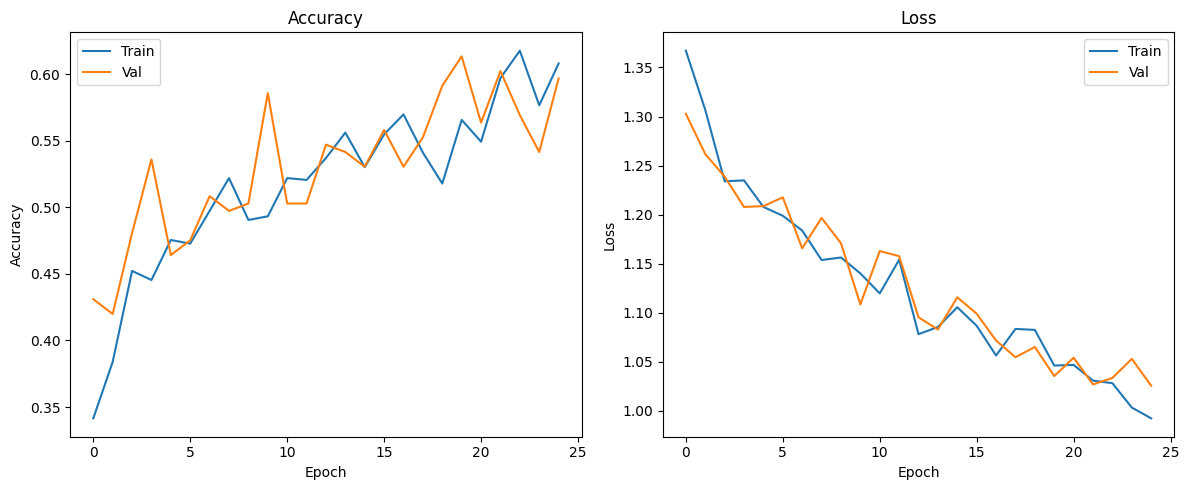

27/27 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step


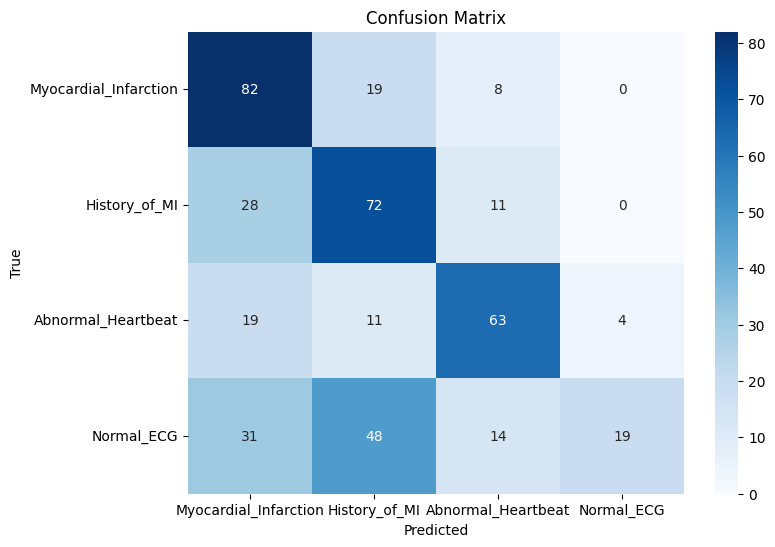


Classification Report:
                       precision    recall  f1-score   support

Myocardial_Infarction       0.51      0.75      0.61       109
        History_of_MI       0.48      0.65      0.55       111
   Abnormal_Heartbeat       0.66      0.65      0.65        97
           Normal_ECG       0.83      0.17      0.28       112

             accuracy                           0.55       429
            macro avg       0.62      0.56      0.52       429
         weighted avg       0.62      0.55      0.52       429

[INFO] Model saved as ecg_xception_model.h5


In [10]:
# ========================================================================
# ECG Arrhythmia Detection - Transfer Learning (Xception)
# Debugged and Optimized for VS Code (Windows + Python 3.13)
# ========================================================================

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ========================================================================
# CONFIGURATION
# ========================================================================

class Config:
    DATASET_DIR = r"C:\Users\gaurav.c.bisht\Downloads\Arrythmia_Image_Collection"
    TRAIN_DIR = os.path.join(DATASET_DIR, "train")
    TEST_DIR = os.path.join(DATASET_DIR, "test")

    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    CHANNELS = 3
    BATCH_SIZE = 16
    EPOCHS = 25
    LEARNING_RATE = 1e-4

    CLASS_NAMES = ["Myocardial_Infarction", "History_of_MI", "Abnormal_Heartbeat", "Normal_ECG"]

config = Config()

print("[INFO] TensorFlow version:", tf.__version__)
print("[INFO] GPU available:", tf.config.list_physical_devices('GPU'))

# ========================================================================
# DATA GENERATORS
# ========================================================================

def create_datagens():
    """Create training, validation, and test data generators"""
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        validation_split=0.2
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(
        config.TRAIN_DIR,
        target_size=(config.IMG_HEIGHT, config.IMG_WIDTH),
        batch_size=config.BATCH_SIZE,
        class_mode="categorical",
        subset="training",
        shuffle=True,
        color_mode="rgb"
    )

    val_gen = train_datagen.flow_from_directory(
        config.TRAIN_DIR,
        target_size=(config.IMG_HEIGHT, config.IMG_WIDTH),
        batch_size=config.BATCH_SIZE,
        class_mode="categorical",
        subset="validation",
        shuffle=False,
        color_mode="rgb"
    )

    test_gen = test_datagen.flow_from_directory(
        config.TEST_DIR,
        target_size=(config.IMG_HEIGHT, config.IMG_WIDTH),
        batch_size=config.BATCH_SIZE,
        class_mode="categorical",
        shuffle=False,
        color_mode="rgb"
    )

    return train_gen, val_gen, test_gen

# ========================================================================
# MODEL
# ========================================================================

def build_model():
    """Build Xception transfer learning model"""
    base_model = Xception(
        include_top=False,
        input_shape=(config.IMG_HEIGHT, config.IMG_WIDTH, config.CHANNELS),
        weights="imagenet"   # Use pretrained ImageNet weights
    )
    base_model.trainable = False  # Freeze base layers initially

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(config.NUM_CLASSES, activation="softmax")
    ])

    optimizer = optimizers.Adam(learning_rate=config.LEARNING_RATE)
    model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

config.NUM_CLASSES = len(config.CLASS_NAMES)

# ========================================================================
# TRAINING
# ========================================================================

def train_and_evaluate():
    train_gen, val_gen, test_gen = create_datagens()

    print("[INFO] Building model...")
    model = build_model()
    model.summary()

    print("[INFO] Training model...")
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=config.EPOCHS,
        verbose=1
    )

    print("[INFO] Evaluating model on test set...")
    loss, acc = model.evaluate(test_gen, verbose=1)
    print(f"[RESULT] Test Accuracy: {acc:.4f}, Loss: {loss:.4f}")

    # ====================================================================
    # PLOTS
    # ====================================================================

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Val")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Val")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # ====================================================================
    # CONFUSION MATRIX
    # ====================================================================

    y_pred = model.predict(test_gen)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_gen.classes

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=config.CLASS_NAMES,
                yticklabels=config.CLASS_NAMES)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=config.CLASS_NAMES))

    return model

# ========================================================================
# MAIN
# ========================================================================

if __name__ == "__main__":
    model = train_and_evaluate()
    model.save("ecg_xception_model.h5")
    print("[INFO] Model saved as ecg_xception_model.h5")
